In [2]:
import matplotlib.pyplot as plt
import numpy as np
import texpy as mz
from src import *

$\frac{\rho_{c,xx}}{W_G}
\int_{-\infty}^{+\infty} \frac{dk}{2\pi}
\frac{\sin(kW_G/2)\omega(k)/k^2}{\omega(k)\coth(kW/2)+k\tan^2(\theta_{VH})\coth[\omega(k)W/2]}$

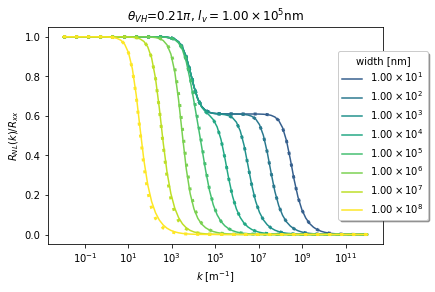

In [51]:
#@title $R_{NL}(k)$ for different widths {vertical-output:true}
#@markdown here you can change the parameters, `l_v`=$l_v$ and `tan`=$\tan(\theta_{VH})$, every time you change the values you have to re-execute the cell
number_of_graphs=8
cmap=plt.get_cmap('viridis')
colors=cmap(np.linspace(.3,1,number_of_graphs))

widths=np.logspace(-8,-1,number_of_graphs,base=10)
#mu=np.linspace(delta,2*delta,number_of_graphs)

lv = 1e-4 #@param {type:"number"}
tan=0.8 #@param {type:"number"}

theta=np.arctan(tan)
for i in range(number_of_graphs):
    k= np.logspace(-2,12,80,base=10,dtype=np.double)
    R=[R_NLk(k,widths[i],lv,tan=tan) for k in k]
    plt.plot(k,R,color=colors[i],label=str(mz.ns(widths[i]*1e9)))
    plt.plot(k,R_NLk0(k,widths[i],lv,tan=tan),linestyle=(0,(1,3)),linewidth=3,color=colors[i])



title_theta='$\\theta_{VH}$='+str(theta/np.pi)[:4]+'$\pi$'
title_lv='$l_v=$'+ str(mz.ns(lv*1e9))+'nm'

title=title_theta + ', ' + title_lv



plt.xscale('log')
plt.xlabel('$k$ [m$^{-1}$]')
plt.ylabel('$R_{NL}(k)/R_{xx}$')
plt.title(title)
plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
plt.savefig('1.png',format='png',dpi=200)
plt.show()
#plt.xlim(0,500)

In [20]:
a=(1,2,3)
b=(4,5,6)

for i,j in zip(a,b):
    print(i,j)

1 4
2 5
3 6


$R_{NL}(x)\approx
\frac{W \rho_{c,xx}e^{-|x|/L_v}}{2L_v[1+\cotg^2(\Theta_{VH})]}-
\frac{2\rho_{c,xx}}{\pi [1+\tan^2(\Theta_{VH})]}\ln \bigg|\tanh \Big(\frac{\pi x}{2W}\Big)\bigg|$


$L_v^2=l_v^2+\frac{W^2}{12}+\frac{l_vW}2\tan^2(\Theta_{VH})\coth\Big(\frac W{2l_v}\Big)
$

In [3]:
#@title Here you can play with the numerical solution {vertical-output:true}
width = 1.7e-6 #@param {type:"number"}
lv = 1.6e-6 #@param {type:"number"}
tan=0.8 #@param {type:"number"}
limit=1e4/width

x=(np.arange(70)*600)*np.pi/limit
Y=R_NLx(x,width,lv,tan,limit=limit)*width

/Users/francesco/Github/Masters_thesis/src/fourier.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return np.array(quad(R_NLk,0,limit,args=args,weight='cos',wvar=x)[0])/np.pi


/Users/francesco/Github/Masters_thesis/src/approximations.py:18: RuntimeWarning: divide by zero encountered in log
  c2= -2*np.log(np.abs(np.tanh(np.pi*x/(2*width))))/(np.pi*(1+tan**2))   #approximation for x close to zero


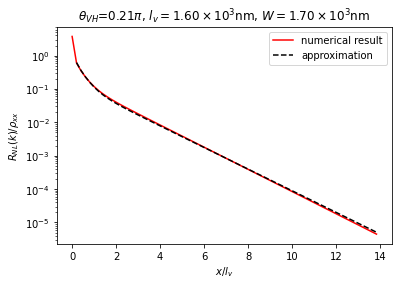

In [4]:
plt.plot(x/lv,Y,color='red',label='numerical result')
    

yappr=R_NL0(x,width,lv,tan) 
plt.plot(x/lv,yappr,color='black',linestyle='--',label='approximation')



plt.yscale('log')
plt.xlabel('$x/l_v$')
plt.ylabel('$R_{NL}(k)/\\rho_{xx}$')

title_width='$W=$'+str(mz.ns(width*1e9))+'nm'
title=title_theta + ', ' + title_lv + ', ' + title_width

plt.title(title)
#plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
#plt.xlim(0,1)
#plt.ylim(1e-3,1)
plt.legend()
plt.savefig('R_NLx.png')

Text(0.5, 1.0, 'The dotted line is the approximation')

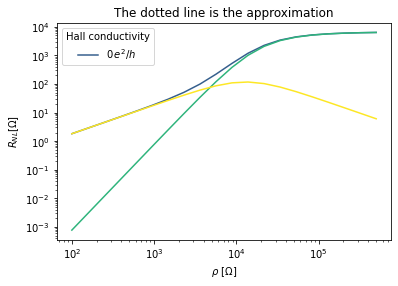

In [34]:


#@title Studying $R_{NL}$ by changing the resistivity of the material $\rho$ at different valley Hall conductivities $\sigma_{v}$ {vertical-output:true}
width = 1.7e-6              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
hall_conductivities=[2] #@param
#@markdown In the graph below is shown $R_{NL0}(x)$ (see equations in the cells above) as we change $\rho$ of the material for different (but quantized Valley-Hall conductivities)

colors=cmap(np.linspace(.3,1,np.max([len(hall_conductivities),3])))
#files=[f'data/H038_D00{2-i}_Temp_RNL-rho.dat' for i in range(3)]

min,max=1e2,5e5
for i in range(len(hall_conductivities)):
    #this part is for the graph of the function
    hall_conductivity=hall_conductivities[i]*e**2/(2*np.pi*hbar)
    rhoxx=np.logspace(np.log10(min),np.log10(max),20)
    tan=rhoxx*hall_conductivity
    plt.plot(rhoxx,R_NLx(x,width,lv,tan,limit=4e13)*rhoxx*width,label=f'${i}\, e^2/h$',color=colors[i])
    plt.plot(rhoxx,R_NL1(x,width,lv,tan)*rhoxx,color=colors[i+1])
    plt.plot(rhoxx,R_NL2(x,width,lv,tan)*rhoxx,color=colors[i+2])

    #this part is for the data
    #data=np.loadtxt(files[i])
    #resistance=data[:,1]
    #rho=data[:,2]
    #plt.plot(rho,resistance,'.',color=colors[i])
    
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Hall conductivity')
plt.xlabel('$\\rho$ [$\Omega$]')
plt.ylabel('$R_{NL}$[$\Omega$]')
plt.title('The dotted line is the approximation')

#@markdown This graph aims to explain the experimental points in figure 2f of this paper https://arxiv.org/pdf/2205.01760.pdf



#plt.plot([1e3,1e4],[2e1,1e3])
#plt.plot([min,max],width/(2*lv*hall_conductivity)*np.array([1,1]),color='black',linestyle='--')


Text(0, 0.5, '$R_{NL}$[$\\Omega$]')

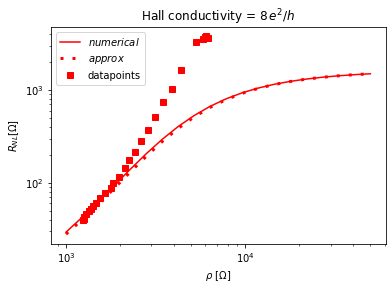

In [ ]:
#@title Confronting with the theory {vertical-output:true}

width = 1.7e-6              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
#@markdown ---
#@markdown `data_file`is a dropdown menu where you can choose the datapoints from the file
data_file = 2 #@param ["0", "1", "2"] {type:"raw"}
#@markdown `hall_cond` is an integer and with it you can change the theoretical prediction of $R_{NL}$ 
hall_cond = 8#@param {type:"integer"}

hall_conductivity=hall_cond*e**2/(2*np.pi*hbar)
rhoxx=np.logspace(np.log10(min),np.log10(max),20)
tan=rhoxx*hall_conductivity

colors=['blue','black','red']

plt.plot(rhoxx,R_NLx(x,width,lv,tan,limit=4e13)*rhoxx*width,label='$numerical$',color=colors[data_file])
plt.plot(rhoxx,R_NL0(x,width,lv,tan)*rhoxx,label='$approx$',linestyle=(0,(1,3)),linewidth=3,color=colors[data_file])

#this part is for the data
data=np.loadtxt(files[data_file])
resistance=data[:,1]
rho=data[:,2]
shapes=['^','o','s']
plt.plot(rho,resistance,shapes[data_file],color=colors[data_file],label='datapoints')
    
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title(f'Hall conductivity = {hall_cond}$\, e^2/h$')
plt.xlabel('$\\rho$ [$\Omega$]')
plt.ylabel('$R_{NL}$[$\Omega$]')

(1000.0, 100000.0)

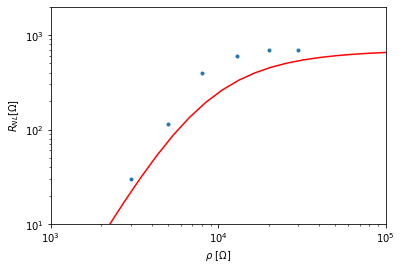

In [ ]:
width = 1e-6              #@param {type:"number"}
lv = 4.6e-6                 #@param {type:"number"}
x=4.5e-6                    #@param {type:"number"}



hall=4
hall_conductivity=hall*e**2/(2*np.pi*hbar)
rhoxx=np.logspace(np.log10(1.4e3),np.log10(1e5),20)
tan=rhoxx*hall_conductivity
plt.plot(rhoxx,R_NL0(x,width,lv,tan)*rhoxx,label=str(hall) + '$\, e^2/h$',color='red')

x=[3e3,5e3,8e3,1.3e4,2e4,3e4]
y=[3e1,1.15e2,4e2,6e2,7e2,7e2]
plt.plot(x,y,'.')
    
plt.xscale('log')
plt.yscale('log')
#plt.legend(title='Hall conductivity')
plt.xlabel('$\\rho$ [$\Omega$]')
plt.ylabel('$R_{NL}$[$\Omega$]')
plt.ylim(1e1,2e3)
plt.xlim(1e3,1e5)